# Necessary libraries

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import  confusion_matrix, classification_report, roc_curve, auc, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
df.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

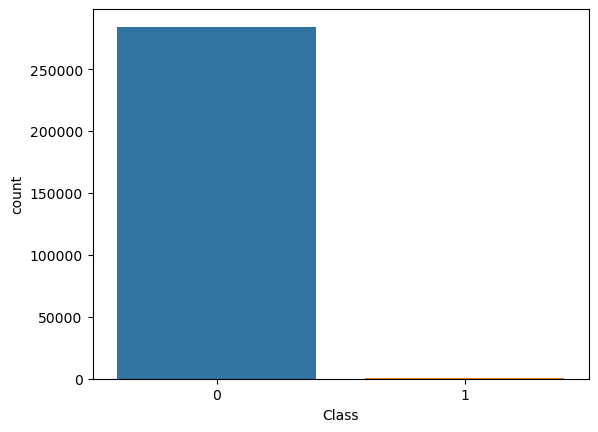

In [7]:
sns.countplot(x = 'Class', data = df)

In [10]:
leg = df[df.Class == 0]
fra = df[df.Class == 1]

In [11]:
df.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [17]:
leg_sample = leg.sample(492)

In [18]:
balanced_df = pd.concat([leg_sample, fra], axis = 0)
balanced_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
254727,156880.0,-0.442819,-5.783245,-4.344922,-0.630346,-1.427247,-0.366124,1.751916,-0.738369,-2.290228,...,1.013346,0.004965,-1.439469,0.382621,0.087663,0.125897,-0.363083,0.156369,1479.88,0
137547,82216.0,-1.900985,2.123982,-1.358326,0.959494,-0.829230,-0.744278,-0.673073,1.676646,-1.049413,...,0.377741,0.752271,0.311390,0.221953,-0.733702,-0.423835,-0.169347,-0.057411,0.99,0
57829,48094.0,1.160105,-0.146600,-0.072842,0.386133,0.360814,0.883715,-0.133478,0.190190,0.198647,...,-0.209480,-0.481426,-0.182950,-1.291538,0.536928,0.359418,-0.015490,-0.005872,49.22,0
282002,170587.0,1.866747,-0.537831,-2.151714,0.548971,2.265381,4.082911,-0.625262,0.989319,0.965801,...,-0.317331,-0.721863,0.240026,0.669533,0.080037,-0.802423,0.050774,-0.043212,46.00,0
194273,130509.0,2.033947,-1.788096,-0.723329,-1.354904,-1.678582,-0.833084,-1.048329,-0.270492,-1.092750,...,-0.066183,0.070507,0.135437,-0.028507,-0.311562,-0.189208,0.004526,-0.021928,144.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [19]:
balanced_df.Class.value_counts()

Class
0    492
1    492
Name: count, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

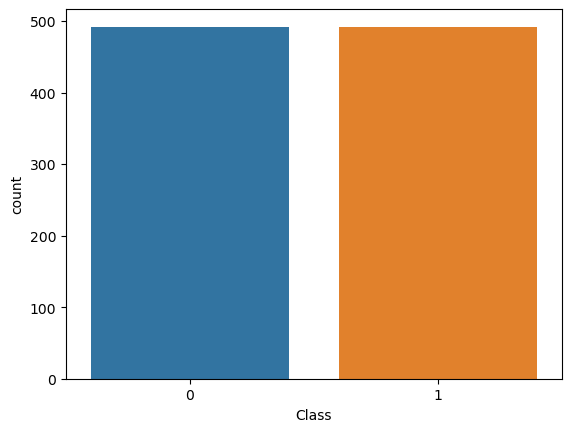

In [20]:
sns.countplot(x = "Class", data = balanced_df)

In [21]:
balanced_df.groupby("Class").mean

<bound method GroupBy.mean of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x000002388A2DCE80>>

<AxesSubplot:>

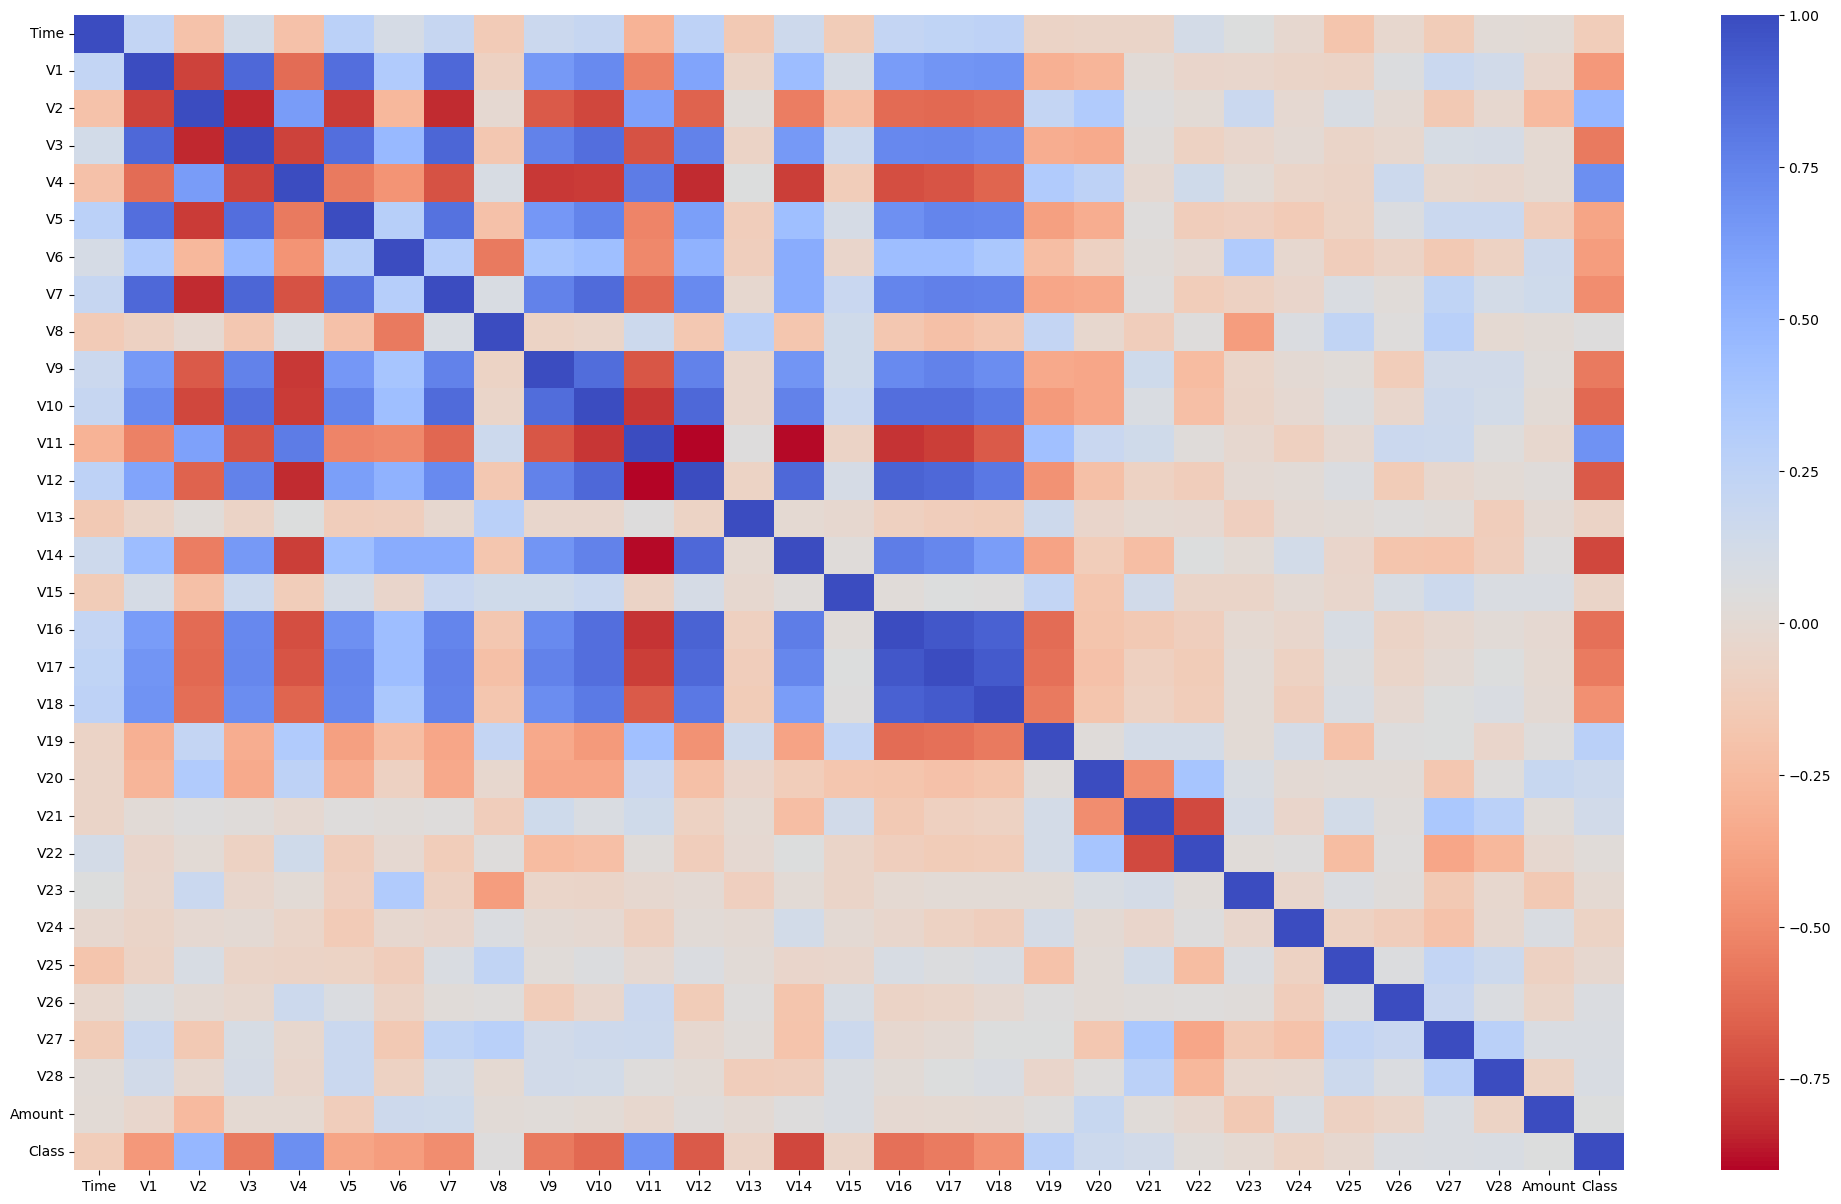

In [22]:
plt.figure(figsize=(25,15))
sns.heatmap(balanced_df.corr(), cmap='coolwarm_r', annot_kws={'size':20})

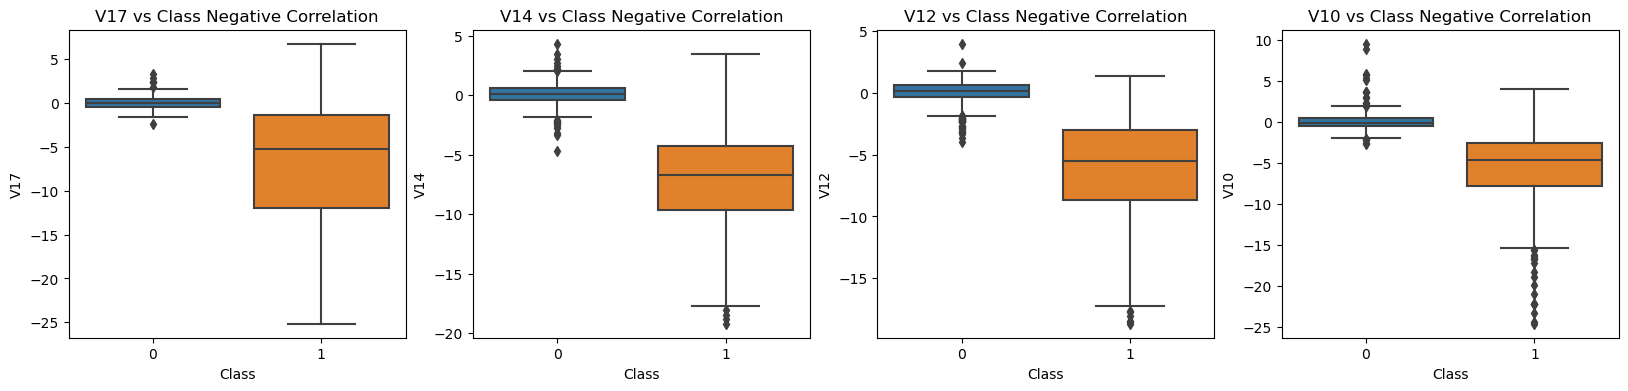

In [24]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))


sns.boxplot(x="Class", y="V17", data=balanced_df, ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=balanced_df, ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V12", data=balanced_df, ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V10", data=balanced_df, ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

plt.show()

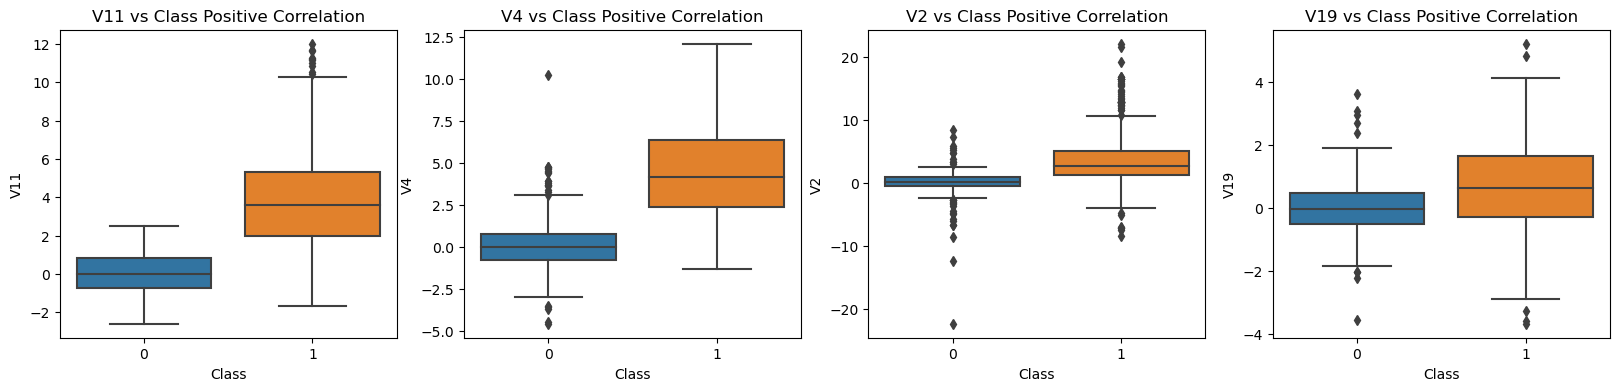

In [25]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.boxplot(x="Class", y="V11", data=balanced_df, ax=axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=balanced_df, ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V2", data=balanced_df, ax=axes[2])
axes[2].set_title('V2 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V19", data=balanced_df, ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()

In [26]:
std_scaler = StandardScaler()
balanced_df['scaled_amount'] = std_scaler.fit_transform(balanced_df['Amount'].values.reshape(-1,1))
balanced_df['scaled_time'] = std_scaler.fit_transform(balanced_df['Time'].values.reshape(-1,1))
balanced_df = balanced_df.drop(["Amount", "Time"],axis=1)

In [27]:
FEATURES = [col for col in balanced_df.columns if col not in ['Class']]
balanced_df["mean"] = balanced_df[FEATURES].mean(axis=1)
balanced_df["std"] = balanced_df[FEATURES].std(axis=1)
balanced_df["min"] = balanced_df[FEATURES].min(axis=1)
balanced_df["max"] = balanced_df[FEATURES].max(axis=1)

In [28]:
x = balanced_df.drop("Class", axis = 1)
y = balanced_df.Class

In [30]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=200)

In [31]:
print(f"We have {len(X_train)} Training data\nWe have {len(X_test)} Testing data")

We have 738 Training data
We have 246 Testing data


In [36]:
def kfolds(model, model_name):
    model = cross_val_score(model, x,y, cv=10)
    model_score = np.average(model)
    print(f"{model_name} score on cross validation: {model_score * 100}%")

def train(model, model_name):
    model.fit(X_train, y_train)
    model_train_score = model.score(X_train, y_train)
    model_test_score = model.score(X_test, y_test)
    print(f"{model_name} model score on Training data: {model_train_score * 100}%\n{model_name} model score on Testing data: {model_test_score * 100}%")

def conf_matrix(model):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True, fmt='d');
    
def class_report(model):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    
def roc(model, model_name):
    y_pred = model.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    auc_svm = auc(fpr, tpr)
    plt.figure(figsize=(5, 5), dpi=100)
    plt.plot(fpr, tpr, color="darkorange", label=f'{model_name} (auc = %0.3f)' % auc_svm)
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    plt.xlabel('False Positive Rate -->')
    plt.ylabel('True Positive Rate -->')
    plt.legend()
    plt.show()

# Logistic Regression

In [37]:
lr_model = LogisticRegression()
kfolds(lr_model, "Logistic Regression")
train(lr_model, "Logistic Regression")

Logistic Regression score on cross validation: 92.78602350030921%
Logistic Regression model score on Training data: 95.79945799457995%
Logistic Regression model score on Testing data: 95.9349593495935%


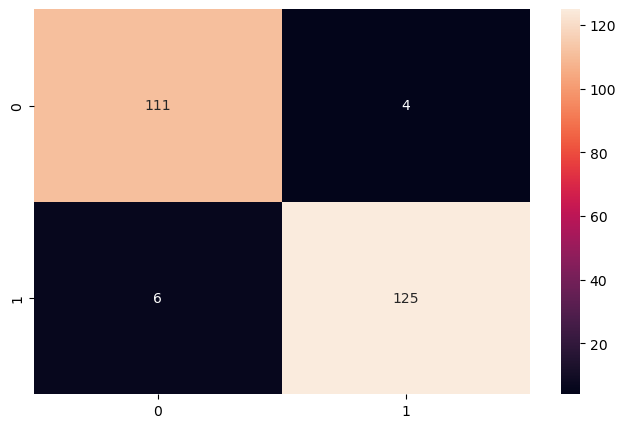

In [38]:
conf_matrix(lr_model)

In [39]:
class_report(lr_model)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       115
           1       0.97      0.95      0.96       131

    accuracy                           0.96       246
   macro avg       0.96      0.96      0.96       246
weighted avg       0.96      0.96      0.96       246



# Random Forest

In [49]:
rf_model = RandomForestClassifier(n_estimators=70, random_state=40)
kfolds(rf_model, "Random Forest")
train(rf_model, "Random Forest")

Random Forest score on cross validation: 93.80230880230881%
Random Forest model score on Training data: 99.86449864498645%
Random Forest model score on Testing data: 95.1219512195122%


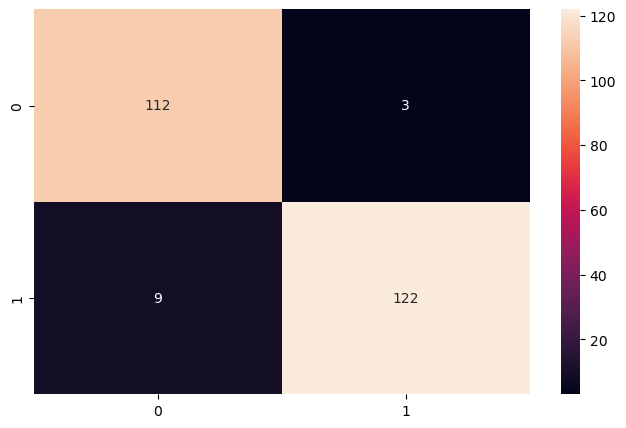

In [50]:
conf_matrix(rf_model)

In [51]:
class_report(rf_model)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       115
           1       0.98      0.93      0.95       131

    accuracy                           0.95       246
   macro avg       0.95      0.95      0.95       246
weighted avg       0.95      0.95      0.95       246



# KNN

In [56]:
knn_model = KNeighborsClassifier(n_neighbors=2)
kfolds(knn_model, "KNN")
train(knn_model, "KNN")

KNN score on cross validation: 93.89919604205319%
KNN model score on Training data: 95.1219512195122%
KNN model score on Testing data: 95.52845528455285%


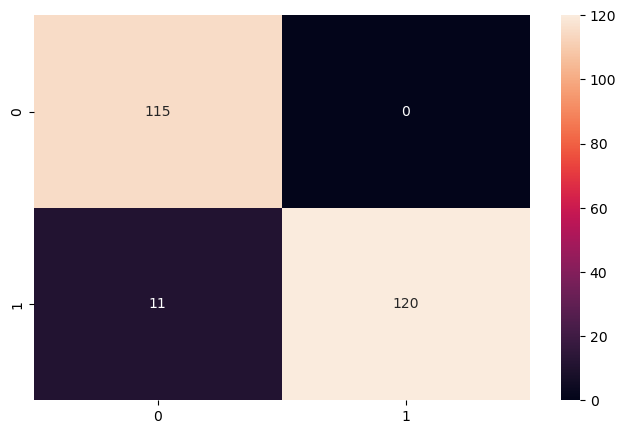

In [57]:
conf_matrix(knn_model)

In [58]:
class_report(knn_model)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       115
           1       1.00      0.92      0.96       131

    accuracy                           0.96       246
   macro avg       0.96      0.96      0.96       246
weighted avg       0.96      0.96      0.96       246



# Bagging

In [59]:
bagg_model = BaggingClassifier()
kfolds(bagg_model, "Bagging")
train(bagg_model, "Bagging")

Bagging score on cross validation: 93.08286951144093%
Bagging model score on Training data: 99.86449864498645%
Bagging model score on Testing data: 93.4959349593496%


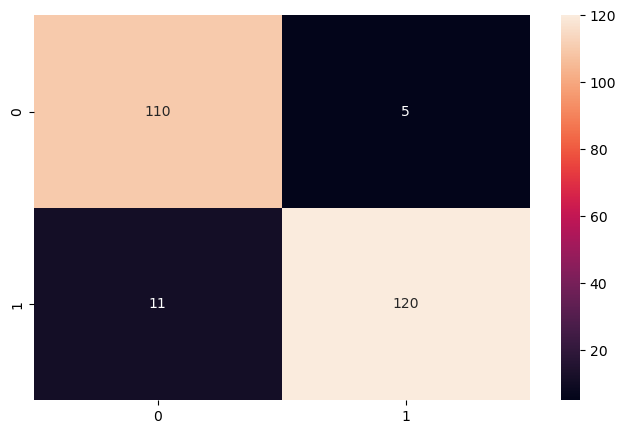

In [60]:
conf_matrix(bagg_model)

In [61]:
class_report(bagg_model)

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       115
           1       0.96      0.92      0.94       131

    accuracy                           0.93       246
   macro avg       0.93      0.94      0.93       246
weighted avg       0.94      0.93      0.94       246



# Decision Tree

In [62]:
dt_model = DecisionTreeClassifier()
kfolds(dt_model, "Decision Tree")
train(dt_model, "Decision Tree")

Decision Tree score on cross validation: 88.6044114615543%
Decision Tree model score on Training data: 100.0%
Decision Tree model score on Testing data: 91.869918699187%


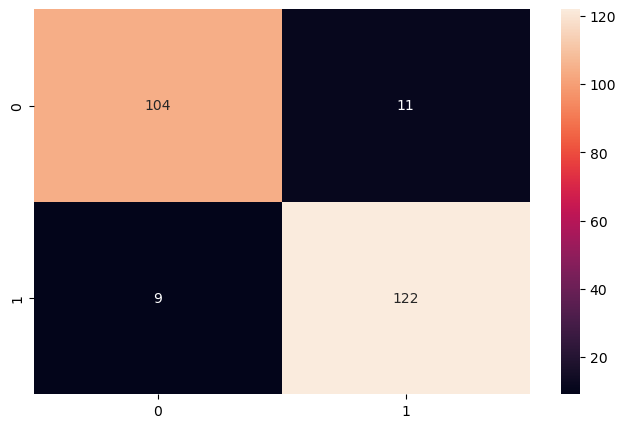

In [63]:
conf_matrix(dt_model)

In [64]:
class_report(dt_model)

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       115
           1       0.92      0.93      0.92       131

    accuracy                           0.92       246
   macro avg       0.92      0.92      0.92       246
weighted avg       0.92      0.92      0.92       246



# SVM

In [65]:
svm_model = SVC(kernel='linear', gamma='auto')
kfolds(svm_model, "SVM")
train(svm_model, "SVM")

SVM score on cross validation: 92.99010513296227%
SVM model score on Training data: 96.07046070460704%
SVM model score on Testing data: 95.9349593495935%


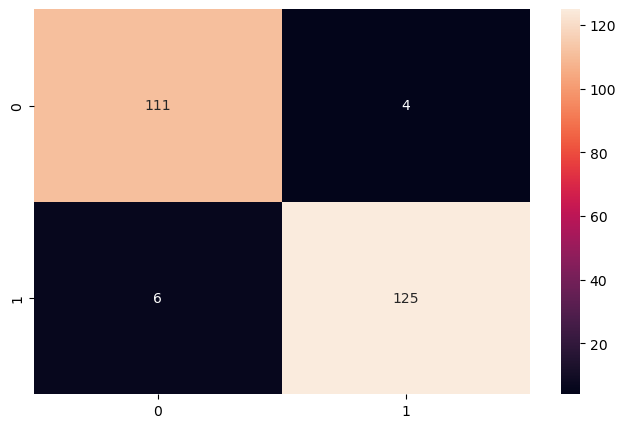

In [66]:
conf_matrix(svm_model)

In [67]:
class_report(svm_model)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       115
           1       0.97      0.95      0.96       131

    accuracy                           0.96       246
   macro avg       0.96      0.96      0.96       246
weighted avg       0.96      0.96      0.96       246

